## Health Insurance Prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

- Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

- You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1338 customers.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/code/shubhamptrivedi/health-insurance-price-predict-linear-regression/input
- The data consists of 7 column and 1338 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [207]:
df = pd.read_csv('data/Health_insurance.csv')

#### Show Top 5 Records

In [208]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Shape of the dataset

In [209]:
df.shape

(1338, 7)

### 2.2 Dataset information

- age
- sex 
- BMI
- no. of children, 
- smoking habits 
- region.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [210]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [211]:
df.duplicated().sum()

1

#### There is 1 duplicate values in the data set

In [212]:
import pandas as pd

# dropping duplicate value
df = df.drop_duplicates()


### 3.3 Check data types

In [213]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [214]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.5 Check statistics of data set

In [215]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### 3.7 Exploring Data

In [216]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [217]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['region'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['yes' 'no']
Categories in'parental level of education' variable: ['southwest' 'southeast' 'northwest' 'northeast']


In [218]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


### 4. Exploring Data ( Visualization )


#### 4.1 Correlation Matrix

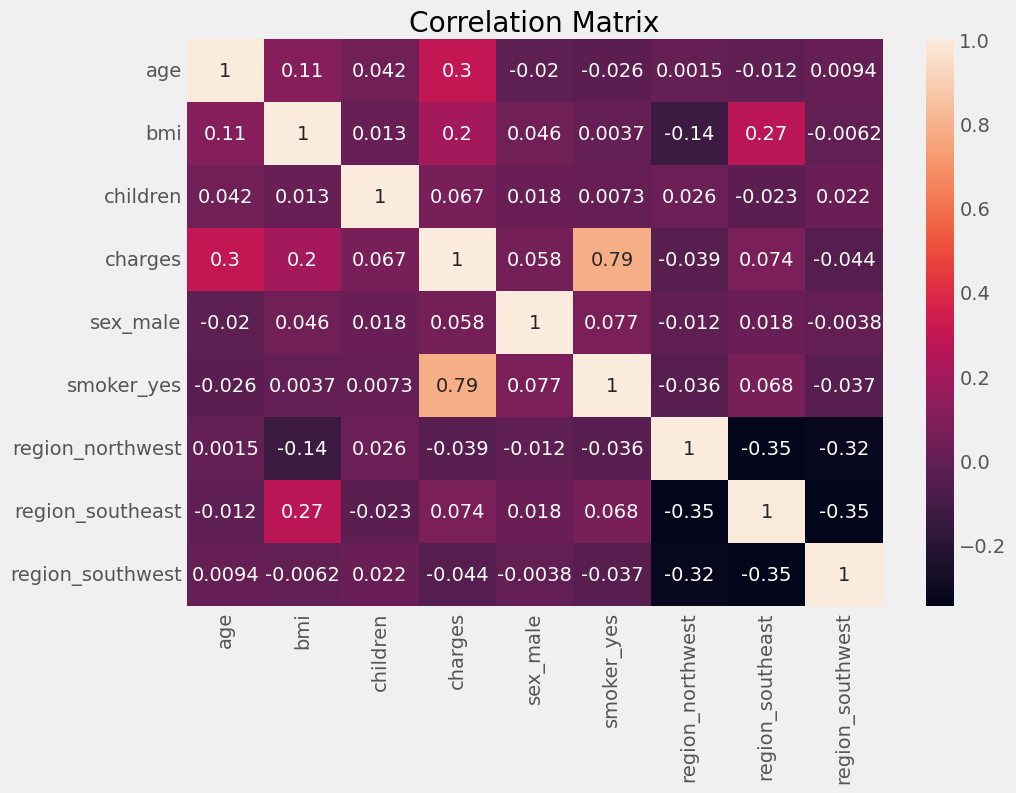

In [219]:

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Create a correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


#### 4.2 Histogram

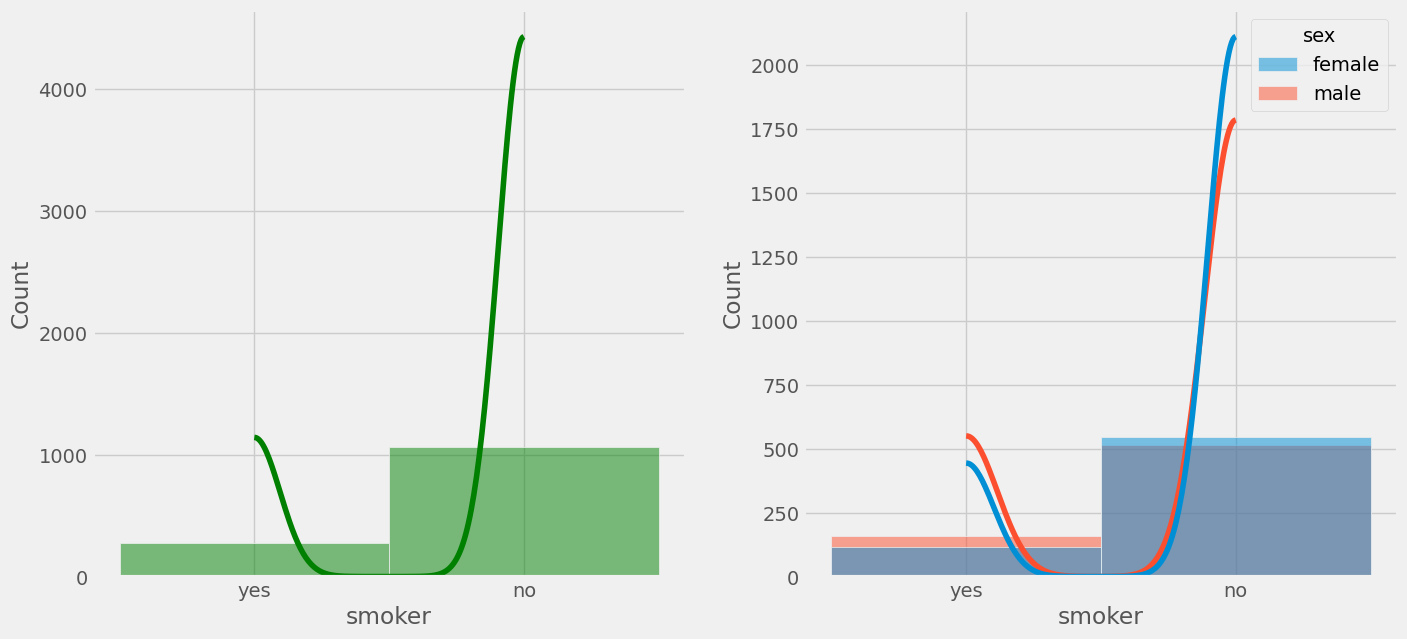

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='smoker',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='smoker',kde=True,hue='sex')
plt.show()

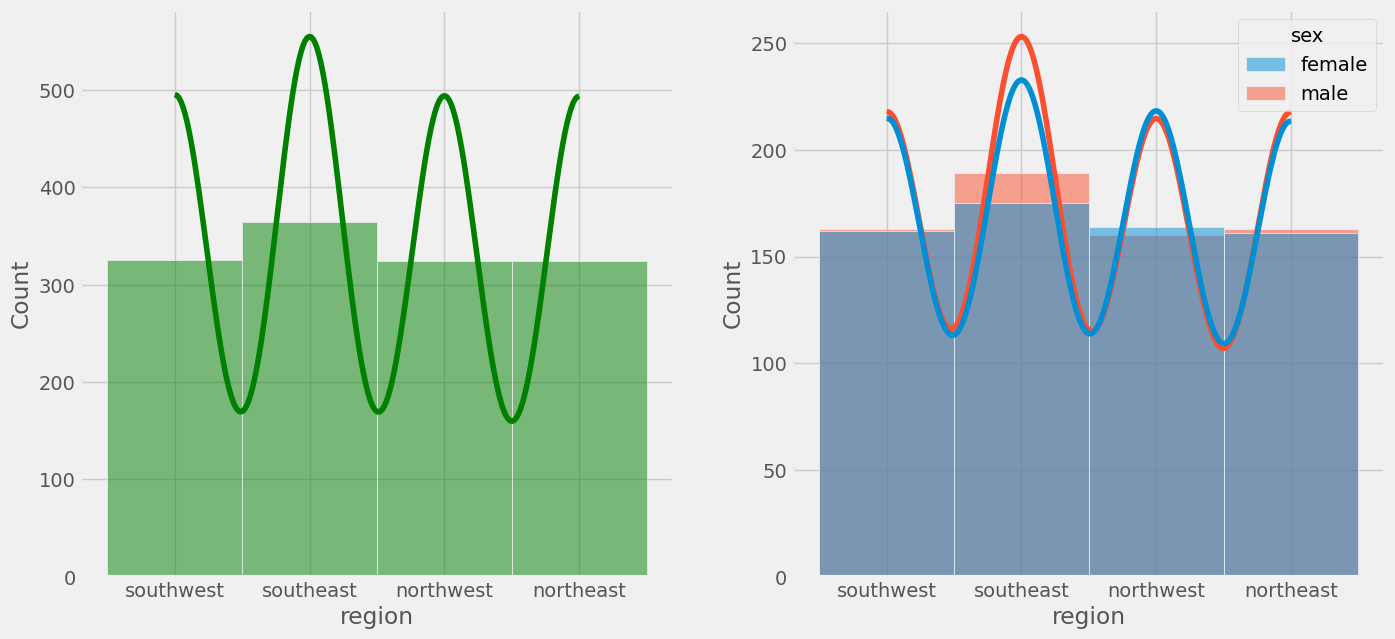

In [221]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='region',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='region',kde=True,hue='sex')
plt.show()

#### 4.3 Barplots

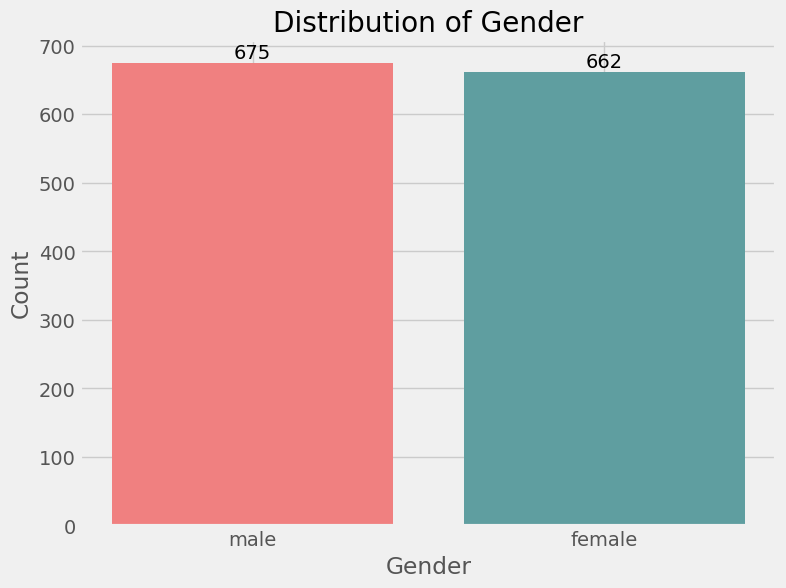

In [239]:
plt.figure(figsize=(8,6))
# label = ['Male', 'Female']
label = df['sex'].value_counts().index
colors = ['lightcoral', 'cadetblue'] 

# Create the bar plot with specified colors
plt.bar(label, df['sex'].value_counts().values, color=colors)

# Add count numbers on top of the bars
for i, count in enumerate(df['sex'].value_counts().values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()


In [223]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


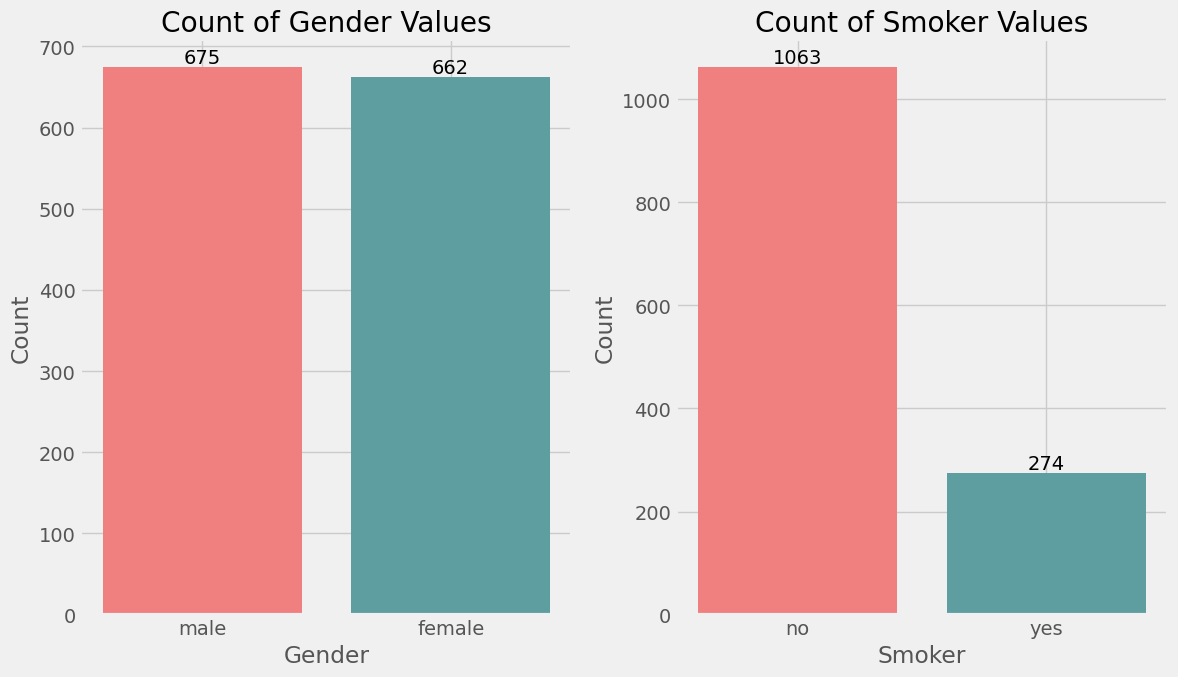

In [230]:


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 7), dpi = 100)
colors = ['lightcoral', 'cadetblue']


# First subplot: Distribution of Gender
label0 = df['sex'].value_counts().index

# Create the bar plot with specified colors
axes[0].bar(label0, df['sex'].value_counts().values, color=colors)

# Add count numbers on top of the bars
for i, count in enumerate(df['sex'].value_counts().values):
    axes[0].text(i, count + 0.1, str(count), ha='center', va='bottom')

axes[0].set_title('Count of Gender Values')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')



# Second subplot: Distribution of Smoker
label1 = df['smoker'].value_counts().index

# Create the bar plot with specified colors
axes[1].bar(label1, df['smoker'].value_counts().values, color=colors)

# Add count numbers on top of the bars
for i, count in enumerate(df['smoker'].value_counts().values):
    axes[1].text(i, count + 0.1, str(count), ha='center', va='bottom')

axes[1].set_title('Count of Smoker Values')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### 4.4 Multivariate analysis using pieplot

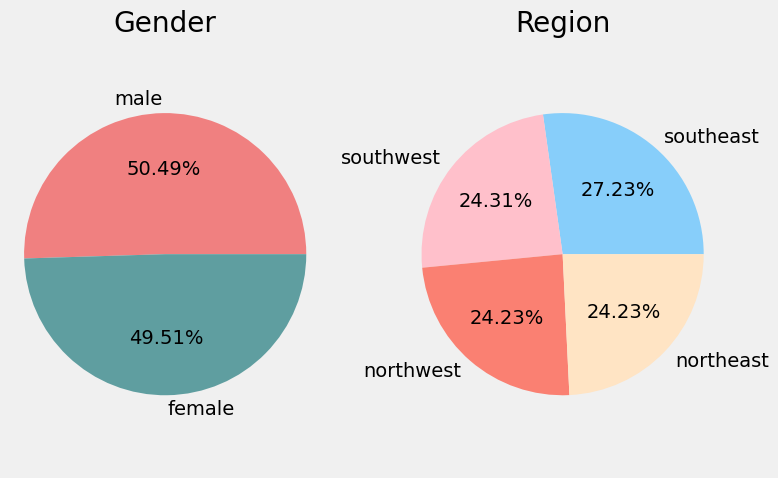

In [229]:
# plt.rcParams['figure.figsize'] = (30, 12)

plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
size = df['sex'].value_counts()
labels = df['sex'].value_counts().index
color = ['lightcoral', 'cadetblue']

# color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender')
plt.axis('equal')


plt.subplot(1, 2, 2)
size = df['region'].value_counts()
labels = df['region'].value_counts().index
color = ['lightskyblue','pink','salmon', 'bisque']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Region')
plt.axis('equal')


plt.tight_layout()
plt.grid()

plt.show()

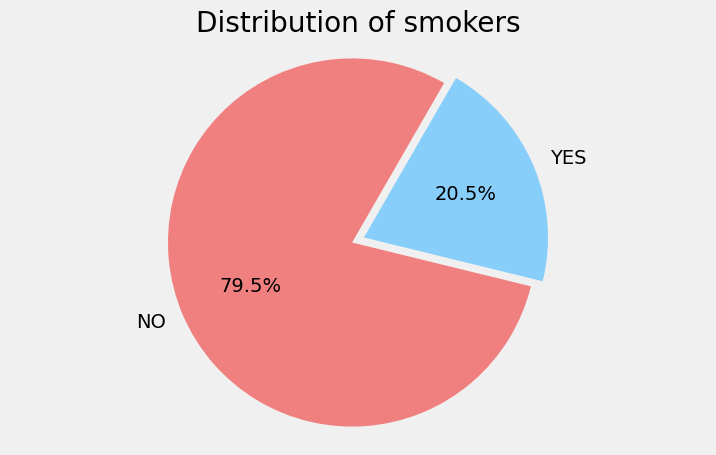

In [226]:
plt.figure(figsize=(8,5))
# Create a pie chart
labels = ['NO', 'YES']
sizes = df['smoker'].value_counts()
colors = ['lightcoral', 'lightskyblue']
explode = (0.07, 0)  # To explode the 1st slice (i.e., 'Positive')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of smokers')

# Display the pie chart
plt.show()

#### 4.5 Subplots between bar plot and pie plots


- Analysis of gender class

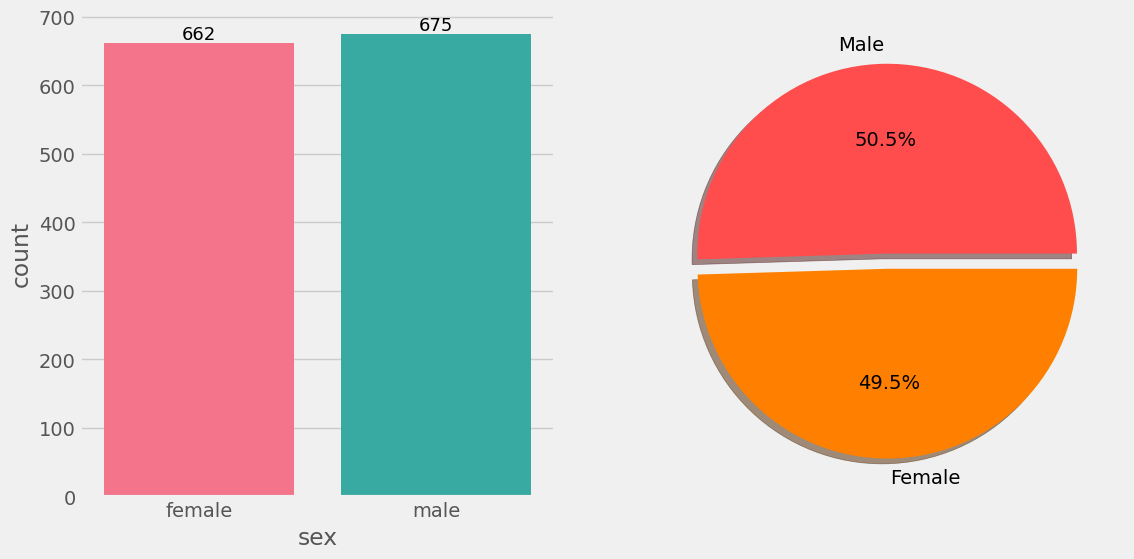

In [227]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['sex'],data=df,palette ='husl',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=13)
    
plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.08],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Analysis of region class

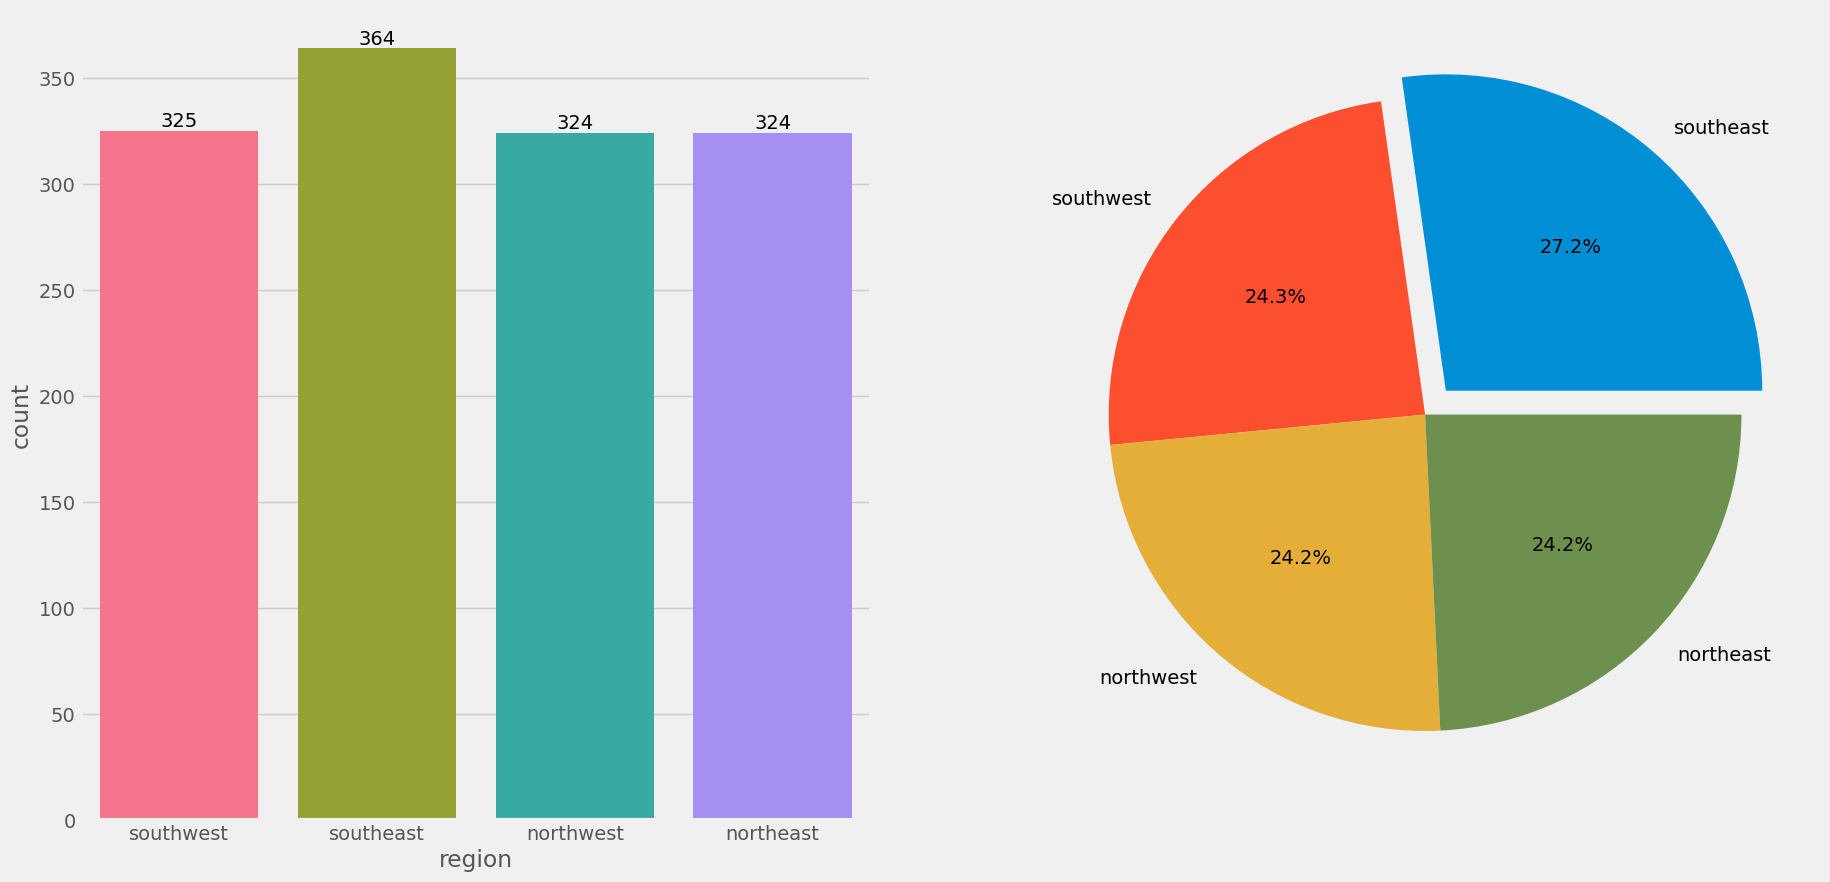

In [228]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['region'],data=df,palette = 'husl',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black')
    
plt.pie(x =df['region'].value_counts(),labels=df['region'].value_counts().index,explode=[0.1,0,0,0],autopct='%1.1f%%')
plt.show()   